In [524]:
# import libraries:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import pickle


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix


RANDOM_STATE = 42

In [525]:
# load dataset:
data = pd.read_csv('hotel_bookings.csv')
# print
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [526]:
data.shape

(119390, 32)

In [527]:
# Print data Summary:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [528]:
# Print columns
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

 Data Cleaning
Missing Data
As models cannot take in null values, it is important to check for and handle missing data before modeling.

In [529]:
# Checking for missing data
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

we found features contain missing data:

children contains 4 observations with missing values.
country contains 488 rows with missing values.

In [530]:
# Replacing null value for country feature with "unknown"
data['country'].fillna("unknown", inplace=True)

In [531]:
## I will  drop subset of the Children feature becaouse is have  missing data  
data.dropna(subset=['children'], inplace=True)

In [532]:
# Changing agent value of "NULL" to "No Agent":
data['agent'] = data['agent'].fillna(0)

In [533]:
# Changing company value of "NULL" to "No Company":
data['company'] = data['company'].fillna(0)

In [534]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Dataset did not contains any missing values.

### Data Types


In [535]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [536]:
# Changing children & company to integer type: 
data['children'] = data['children'].astype(int)
data['company'] = data['company'].astype(int)

 ### EXPLORATORY DATA ANALYSIS📊


### Feature Engineering

In [537]:
# Creating the arrival date feature: 
data['arrival_date'] = data['arrival_date_year'].astype(str) + "-" + data['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}).astype(str) + "-" + data['arrival_date_day_of_month'].astype(str)
data['arrival_date'] = pd.to_datetime(data['arrival_date'], format="%Y-%m-%d")

In [538]:
data["total_nights"] = data["stays_in_weekend_nights"] + data["stays_in_week_nights"]

In [539]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2


### what percentage of canceled vs not canceled bookings ?

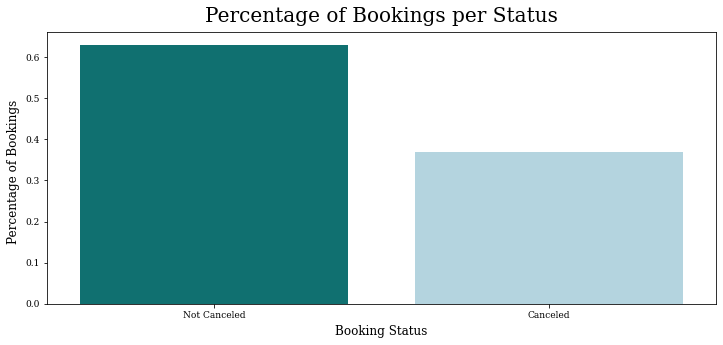

In [540]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(12,5)) 
plt.title("Percentage of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'].unique(),y=data['is_canceled'].value_counts(normalize=True), palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings  ", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

Interpretation: 37% of bookings were canceled. 

In [541]:
total_cancelations = data['is_canceled'].sum()
print(total_cancelations)
rh_cancelations = data.loc[data["hotel"]=="Resort Hotel"]["is_canceled"].sum()
print(rh_cancelations)
ch_cancelations = data.loc[data["hotel"]=="City Hotel"]["is_canceled"].sum()
print(ch_cancelations)

44220
11122
33098


### Which months guests are high?

Text(0, 0.5, 'Percentage of guests')

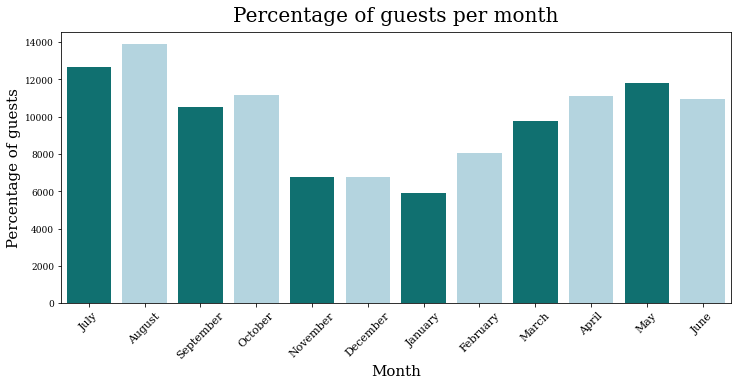

In [542]:
# Visualizing the percentage of arrival_date_month  to count: 
fig = plt.figure(figsize=(12,5))
plt.title("Percentage of guests per month", fontsize = 20, pad = 10)
sns.countplot(data=data, x = 'arrival_date_month', palette=['teal', 'lightblue'])
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11);
plt.ylabel('Percentage of guests', fontsize=15)

The above plot shows that August was the busiest month and January was the least (Probably because of the Holiday season in Summer in August and Heavy Winter in January) The high footfall in Jan is followed by July and May.

### what is the highest month have cancellation ?

Text(0.5, 0, 'Percentage of cancellation')

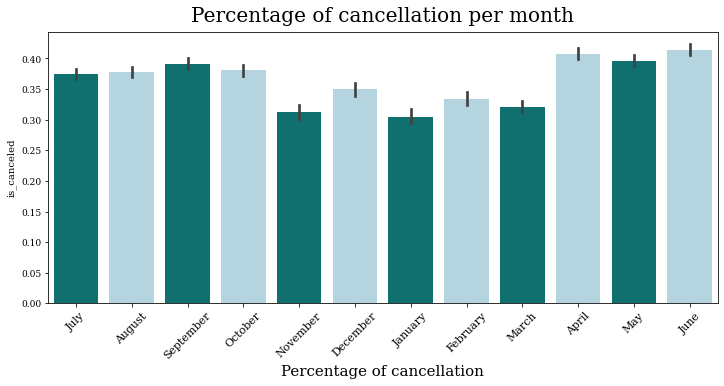

In [543]:
fig = plt.figure(figsize=(12,5))
plt.title("Percentage of cancellation per month", fontsize = 20, pad = 10)
sns.barplot(data =data ,x = "arrival_date_month", y = "is_canceled", palette=['teal', 'lightblue'] )
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11);
plt.xlabel('Percentage of cancellation', fontsize=15)

The highest cancellation rate was in June then April


### what is the percentage of bookings canceled prior to arrival ?

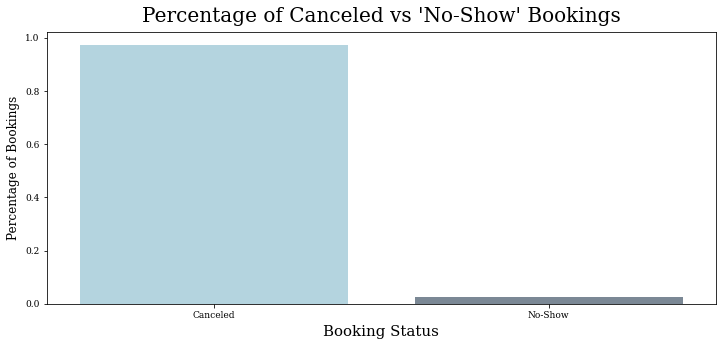

In [544]:
# Visualizing the percentage of bookings canceled prior to arrival 
plt.figure(figsize=(12,5)) 
plt.title("Percentage of Canceled vs 'No-Show' Bookings", fontsize = 20, pad = 10)
sns.barplot(x=data[data['is_canceled']==1]['reservation_status'].unique(), y=data[data['is_canceled']==1]['reservation_status'].value_counts(normalize=True), palette=['lightblue', 'lightslategrey'])
plt.xlabel("Booking Status", fontsize = 15, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5);

Interpretation: A vast majority of bookings (97%) are canceled prior to arrival.



### correlation

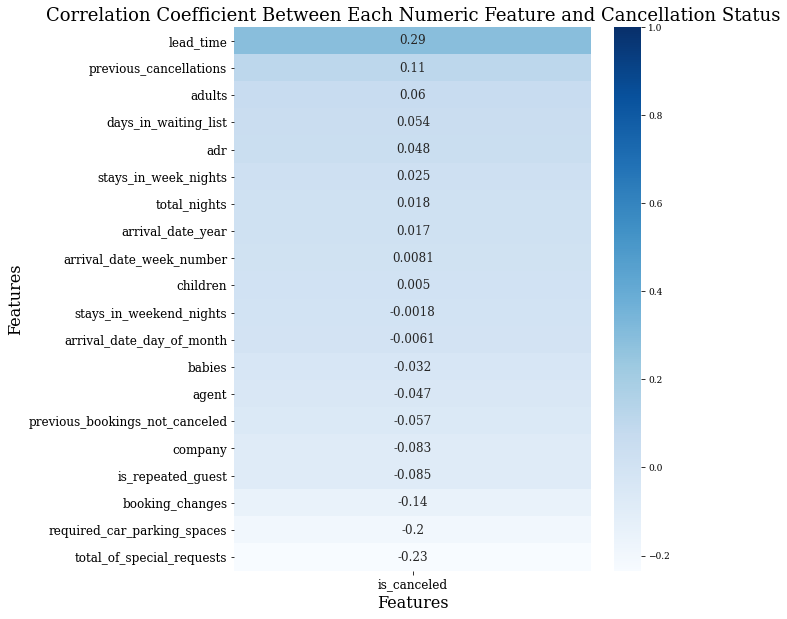

In [545]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(data.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

Lead time is the most highly correlated feature with whether or not a booking is canceled.

The total number of special requests is the second feature with the strongest correlation to our cancellation target. special requests, the number of required car parking spaces is the third feature with the strongest correlation to our cancellation target

Customer's prior history with the hotel ( the number of previous bookings not canceled or whether or not a customer is a repeated guest) does not seem to be highly correlated with whether or not the current booking will be canceled. On the other hand, a customer's prior history of cancellation (measured by the number of previous cancellations is more highly correlated with whether or not the current booking will be canceled.


### what is the average lead time for canceled and not canceled? 

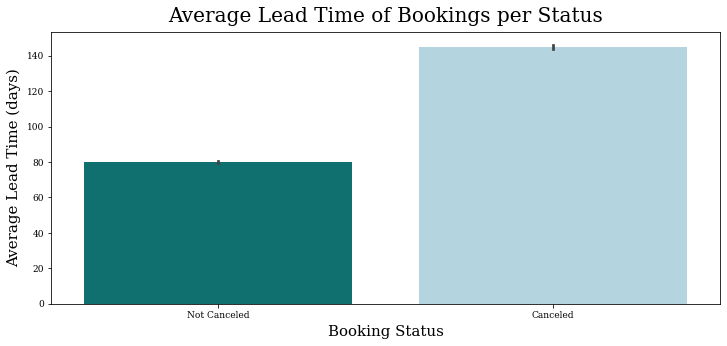

In [546]:
# Visualizing the average lead time for canceled and not canceled bookings:
plt.figure(figsize=(12,5)) 
plt.title("Average Lead Time of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=data['is_canceled'], y=data['lead_time'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 15, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 15, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

### Were most guests come from  ?

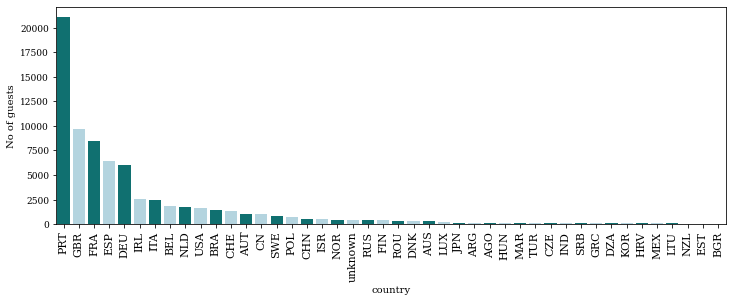

In [547]:
#data['country'].value_counts()
fig = plt.figure(figsize=(12,4))
country_wise_guests = data[(data['is_canceled'] == 0)]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests = country_wise_guests[country_wise_guests['No of guests'] > 60]
sns.barplot(data=country_wise_guests, x = 'country', y = 'No of guests' , palette=['teal', 'lightblue'])
plt.xticks(rotation=90,fontsize=11);

Most of the guest are from Portugal then the second is  Great Britain,
then Next is France, Spain, Germany, and Ireland


### What about the effect of deposit in cancellation ?

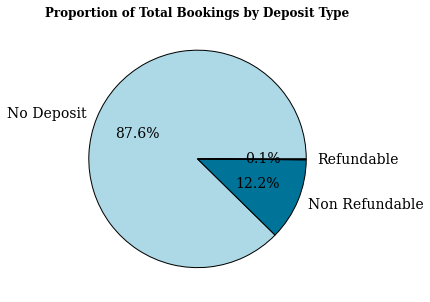

In [548]:
proportion = data['deposit_type'].value_counts()
labels = ['No Deposit','Non Refundable','Refundable']
plt.figure(figsize=(12,5))
plt.title('Proportion of Total Bookings by Deposit Type',weight = 'bold' )
plt.pie(proportion,labels=labels, autopct = '%1.1f%%', wedgeprops= {'edgecolor':'black'},textprops={'fontsize':14} , colors = ['#ADD8E6','#007399'])
plt.show()



Interpretation: 
Around 87.6% bookings are booked without deposit, 12.2% bookings are booked with Non Refundable Policy and 0.1% bookings are booked with Refundable Policy, Reservations with No-deposit or Non-refund policy are more likely to be canceled
Surprisingly, customers who pay a non-refundable deposit have a much higher percentage of canceled reservations.


Text(0.5, 0, 'customer type')

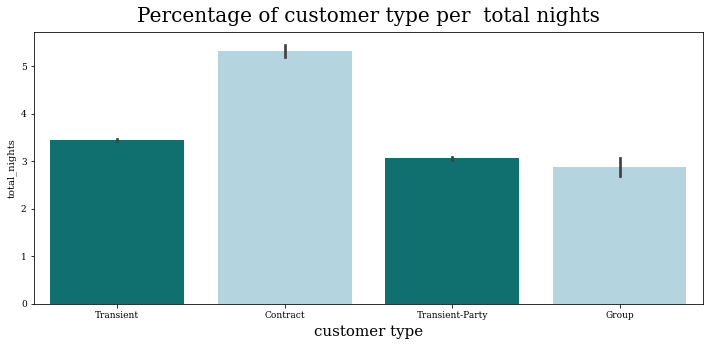

In [549]:
# Visualizing  customer type for total nights 
plt.figure(figsize=(12,5)) 
plt.title("Percentage of customer type per  total nights", fontsize = 20, pad = 10)
sns.barplot(x=data['customer_type'], y=data['total_nights'], palette=['teal', 'lightblue'])
plt.xlabel("customer type", fontsize = 15, labelpad = 5)

Contract type clients had the highest  total night stay rate

### Data Pre-Processing

In [550]:
data = pd.get_dummies(data, columns=['arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'])

In [551]:
import random

X = data.drop(columns=['hotel','is_canceled','reservation_status', 'agent', 'company', 'country', 
                     'reservation_status_date', 'arrival_date','total_nights' ])
y = data['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, stratify=y, test_size=0.15)


In [552]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [553]:
X_test_scaled

array([[ 0.6732292 , -0.22217047, -1.03846427, ..., -0.06893888,
         0.57723648, -0.51738061],
       [-0.9153446 ,  1.19222192, -1.25882101, ..., -0.06893888,
         0.57723648, -0.51738061],
       [ 1.17783499,  1.19222192, -0.37739405, ..., -0.06893888,
         0.57723648, -0.51738061],
       ...,
       [-0.87796639, -1.63656286,  0.43058066, ..., -0.06893888,
         0.57723648, -0.51738061],
       [ 2.43934948, -0.22217047,  1.09165088, ..., -0.06893888,
        -1.73239224,  1.93281305],
       [-0.27991508, -1.63656286,  0.7978419 , ..., -0.06893888,
        -1.73239224,  1.93281305]])

# Model

## DecisionTree Model

[[9646 1629]
 [1488 5145]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     11275
           1       0.76      0.78      0.77      6633

    accuracy                           0.83     17908
   macro avg       0.81      0.82      0.81     17908
weighted avg       0.83      0.83      0.83     17908



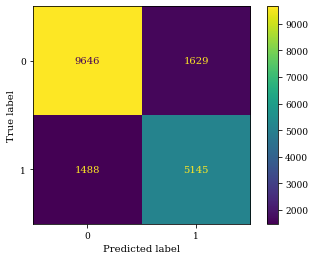

In [554]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
DecisionTreeClassifier()
tree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))
print(plot_confusion_matrix(dtree, X_test ,y_test ))

# The Random Forest model

[[10490   785]
 [ 1502  5131]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11275
           1       0.87      0.77      0.82      6633

    accuracy                           0.87     17908
   macro avg       0.87      0.85      0.86     17908
weighted avg       0.87      0.87      0.87     17908



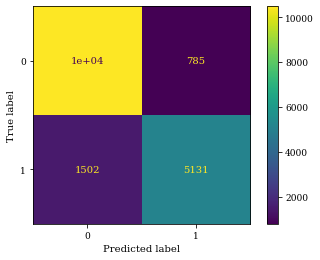

In [555]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
RandomForestClassifier()
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print(plot_confusion_matrix(rf, X_test, y_test))

### KNN

[[10332   943]
 [ 2196  4437]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     12528
           1       0.67      0.82      0.74      5380

    accuracy                           0.82     17908
   macro avg       0.79      0.82      0.80     17908
weighted avg       0.84      0.82      0.83     17908



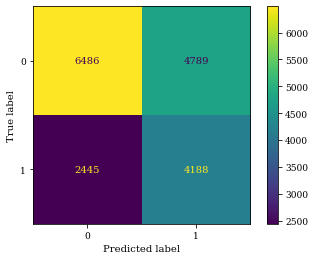

In [563]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier
)
knn.fit(X_train_scaled,y_train)
y_pred_knn = knn.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred_knn ))
print(classification_report(y_pred_knn,y_test))
print(plot_confusion_matrix(knn , X_test ,  y_test ))

## Logistic Regression Model

C:\Users\lama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[9877 1398]
 [2590 4043]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83     11275
           1       0.74      0.61      0.67      6633

    accuracy                           0.78     17908
   macro avg       0.77      0.74      0.75     17908
weighted avg       0.77      0.78      0.77     17908



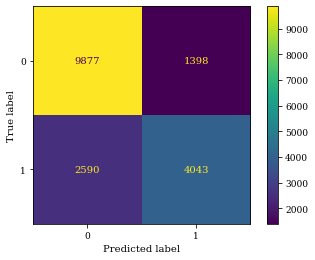

In [556]:
from sklearn.linear_model import LogisticRegression


LR = LogisticRegression()
LR.fit(X_train, y_train)
LogisticRegression()
LR_pred = LR.predict(X_test)
print(confusion_matrix(y_test, LR_pred))
print(classification_report(y_test, LR_pred))
print(plot_confusion_matrix(LR , X_test ,  y_test ))

In [570]:
# Creating a dataframe to compare our models' performances:
predictive_model_scores = pd.DataFrame(data=[('Decision Tree',0.83), ('Random Forest', 0.87), 
                                             ('KNN',0.82 ),('Logistic Regression ', 0.78 )],
                                       columns=['model', 'accuracy'])
predictive_model_scores

,model,accuracy
0,Decision Tree,0.83
1,Random Forest,0.87
2,KNN,0.82
3,Logistic Regression,0.78


# Conclusion 

#### We identified a Random Forest as the model giving us the highest predictive power.This model classifies whether or not a booking will be canceled with  87% accuracy. As a result, this model would allow hotels to more accurately forecast their occupancy, manage their business accordingly, and increase their revenue.
 